In [31]:
# loading libs
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# defining XOR model
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y = np.array([[0], [1], [1], [0]], dtype=np.float32)

In [33]:
# function to create a model with x function
def create_model(activation):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(2, activation=activation, input_shape=(2,)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

# function to train a model with just the model name
def train_model(model, epochs=10000, lr=1.0):
    optimizer = tf.keras.optimizers.SGD(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='mse', metrics=['accuracy'])
    
    history = model.fit(X, y, epochs=epochs, verbose=0)
    return history

In [34]:
sigmoid_model = create_model('sigmoid')
sigmoid_history = train_model(sigmoid_model, epochs=10000, lr=1.0)

/Users/shreyjain/Documents/CODING/MCA-Assignments/Trimester-5/nndl/.venv/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
tanh_model = create_model('tanh')
tanh_history = train_model(tanh_model, epochs=10000, lr=1.0)

In [36]:
# a function to plot the loss
def plot_history(history, title):
    plt.plot(history.history['loss'])
    plt.title(title)
    plt.grid()
    plt.show()

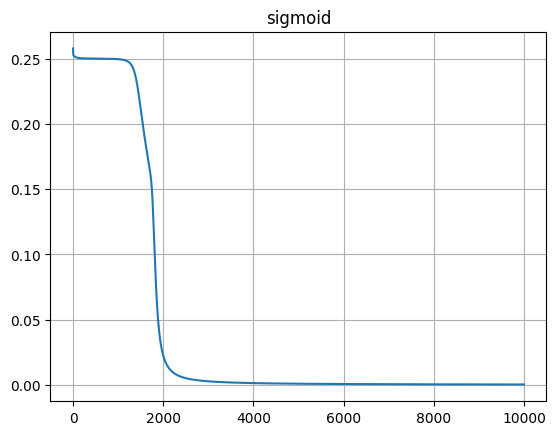

In [37]:
plot_history(sigmoid_history, "sigmoid")

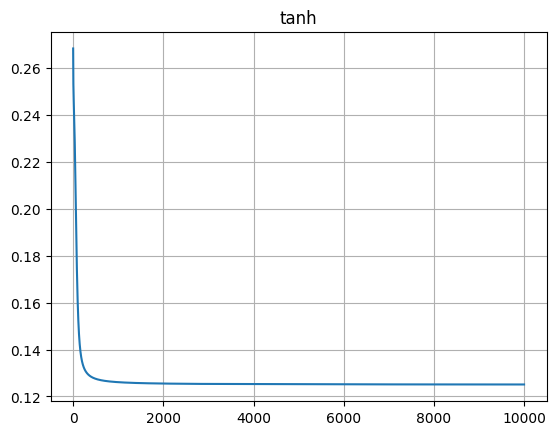

In [38]:
plot_history(tanh_history, "tanh")

In [39]:
# a function to display model weights
def display_model_weights(model, decimals=4):
    print(f"Model: {model.name}\n")
    for i, layer in enumerate(model.layers):
        weights = layer.get_weights()
        if not weights:
            print(f"Layer {i}: no trainable weights\n")
            continue

        kernel = weights[0]
        print(f"Layer {i} kernel {kernel.shape}:")
        print(np.array2string(kernel, precision=decimals, separator=', ', suppress_small=True))

        if len(weights) > 1:
            bias = weights[1]
            print(f"Layer {i} bias {bias.shape}:")
            print(np.array2string(bias, precision=decimals, separator=', ', suppress_small=True))

        print()


In [40]:
display_model_weights(sigmoid_model)

Model: sequential_4

Layer 0 kernel (2, 2):
[[-5.6934, -6.3237],
 [ 5.8638,  6.1437]]
Layer 0 bias (2,):
[ 2.8615, -3.3137]

Layer 1 kernel (2, 1):
[[-9.1785],
 [ 9.3987]]
Layer 1 bias (1,):
[4.3642]



In [41]:
display_model_weights(tanh_model)

Model: sequential_5

Layer 0 kernel (2, 2):
[[ 5.2811, -5.3349],
 [ 2.0143,  2.2448]]
Layer 0 bias (2,):
[-0.5065, -1.7223]

Layer 1 kernel (2, 1):
[[3.461 ],
 [3.5684]]
Layer 1 bias (1,):
[0.1074]

